### Dependencias

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron

### Generación de datos sintéticos

In [16]:
# make_blobs se puede usar para generar blobs de puntos con una distribución gaussiana.
# BLOB (Binary Large Object) (Objeto binario grande) Almacena datos binarios.

X,y = make_blobs(100,2, centers=2, cluster_std=0.2)

In [17]:
X,y

(array([[ 2.47254287, -2.12431188],
        [ 2.29747744, -2.27342676],
        [ 2.35497187, -2.06461127],
        [-2.9515065 ,  9.0179154 ],
        [-3.12933847,  9.29179668],
        [ 1.94553809, -2.19169967],
        [ 2.39912853, -2.01695817],
        [ 2.30793877, -2.7552701 ],
        [ 2.42439581, -2.31974801],
        [ 2.18015657, -2.199617  ],
        [ 1.87562369, -2.29417483],
        [-2.93869893,  9.80023812],
        [-3.01968949,  9.01645201],
        [ 2.09956892, -2.24299335],
        [ 2.64087877, -2.71164841],
        [-3.48883212,  9.18693124],
        [ 2.35388903, -2.60192909],
        [-3.47244998,  9.19052073],
        [-3.13517993,  9.25284037],
        [-2.94847976,  9.14447261],
        [-3.18483337,  9.11989465],
        [-3.19642418,  8.99389136],
        [-2.65773572,  9.11281708],
        [ 2.06502303, -2.7104417 ],
        [-3.33504699,  9.5019234 ],
        [-2.99351101,  9.06421559],
        [-3.10784379,  8.91386044],
        [ 2.6111718 , -1.999

### Conjunto de Entrenamiento
$$S_n=\{(x^{(i)},y^{(i)}), i = 1, \cdots, n\}$$

In [18]:
Sn = pd.DataFrame(X,columns=['x1','x2'])
Sn['y']=y

Sn.head()

,x1,x2,y
0,2.472543,-2.124312,0
1,2.297477,-2.273427,0
2,2.354972,-2.064611,0
3,-2.951507,9.017915,1
4,-3.129338,9.291797,1


* Con hue= indicamos el titulo en las leyendas además de que nos sirve para ver todas las categorías (si lo omitimos solo se muestran los datos azules) y con fit_reg= False indicamos que no queremos que se marquen las regresiones en nuestro diagrama.

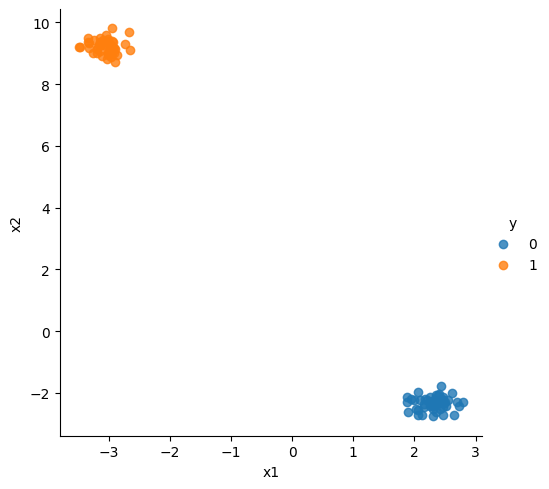

In [19]:
sns.lmplot(data=Sn, x='x1',y='x2',hue='y', fit_reg=False)

In [20]:
x=Sn.loc[10]
x

x1    1.875624
x2   -2.294175
y     0.000000
Name: 10, dtype: float64

In [21]:
x=Sn.loc[10].values[:2]
x

array([ 1.87562369, -2.29417483])

In [22]:
np.sign(-10)

-1

In [23]:
np.sign(10)

1

### Implementación del Perceptrón 

In [24]:
def PerceptronCasero (Sn:pd.DataFrame,T:int)->tuple:
    k=0  #Esto es solo para contar los errores
    
    # Usamos el -1, porque necesitamos el último numero que arroja la función
    #  (Es lo mismo que usar [1], ya que shape() arroja dos valores, posición 0 y 1)
    d= Sn.shape[-1]-1
    n= Sn.shape[0]
    theta= np.zeros(d)
    # Usamos datos tipo float para evitar errores en la compilación
    theta0= 0.0

    for t in range(T):
        for i in range(n):
            x=Sn.loc[i].values[:d]
            y=Sn.loc[i].values[-1]
            
            # Recordemos que lo que buscamos es +1 o -1 (resultado que está en relación al producto punto),
            # pero no el valor del producto punto.
            if y*(np.sign(np.dot(theta,x+theta0)))<=0:
                k += 1
                theta += y*x
                theta0 +=y   
                # print(theta,theta0)
    
    return theta,theta0,k



In [25]:
theta,theta0,k=PerceptronCasero(Sn,20)
theta,theta0,k

(array([-2.9515065,  9.0179154]), 1.0, 1001)

### Ecuación del Clasificador 
$$\theta\cdot x + \theta_0$$

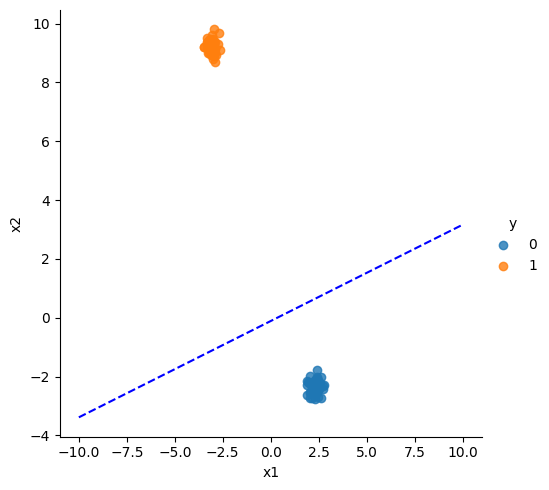

In [26]:
sns.lmplot(data=Sn, x='x1',y='x2', hue='y', fit_reg=False)
x1 = np.linspace(-10,10,100)
x2 = (-theta0-theta[0]*x1)/theta[1]
plt.plot(x1,x2,linestyle='--', color='blue')

### Con sklearn

In [27]:
per = Perceptron()

In [28]:
per.fit(Sn[['x1','x2']],Sn['y'])

Perceptron()

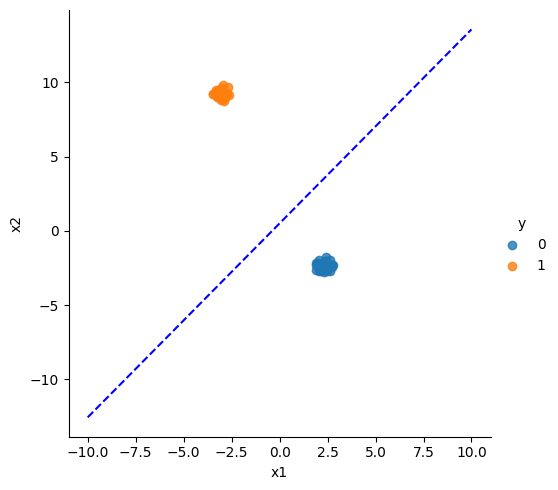

In [29]:
theta,theta0 = per.coef_[0],per.intercept_[0]
sns.lmplot(data=Sn, x='x1',y='x2', hue='y', fit_reg=False)
x1 = np.linspace(-10,10,100)
x2 = (-theta0-theta[0]*x1)/theta[1]
plt.plot(x1,x2,linestyle='--', color='blue')